<a href="https://colab.research.google.com/github/bootnoodles/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module3-dimensionality-reduction/LS_DS_133_High_Dimensional_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np 

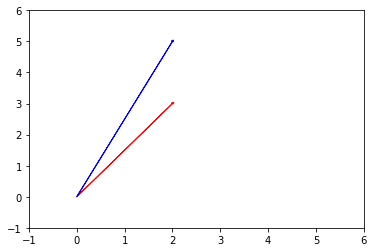

In [ ]:
plt.arrow(0,0, 2,3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, 2,5, head_width=.05, head_length=0.05, color ='blue')
plt.xlim(-1,6)          
plt.ylim(-1,6)
plt.show()

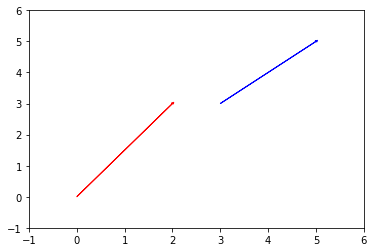

In [ ]:
plt.arrow(0,0, 2,3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(3,3, 2,2, head_width=.05, head_length=0.05, color ='blue')
plt.xlim(-1,6)          
plt.ylim(-1,6)
plt.show()

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

These arent considered functions because you wouldnt ever get two of the same x values from a function.

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

Relation 2
It has no repeated x values.

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

The input is : 3 Dimensional

The output is : 4 Dimensional


## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

No, you cant create another plane from a single line, there just isnt enough information to turn one dimension into two, its easier to squash data than it is to expand it on another axis

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

What is there to plug in? Its all X? 

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [ ]:
# Transformation Matrix
T1 = np.array([[1,3],[-1,2]])
# Input Vector
v1 = np.array([2,3])
# Product found by hand-calculating
product_by_hand_1 = [11, 4]
# Product found with NumPy
np.matmul(T1, v1)

array([11,  4])

In [ ]:
# Transformation Matrix
T2 = np.array([[4,1,2],[-1,2,3],[5,1,-2]])
# Input Vector
v2 = np.array([1,2,3])
# Product found by hand-calculating
product_by_hand_2 = [12, 12, 1]
# Product found with NumPy
np.matmul(T2, v2)

array([12, 12,  1])

# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

Eigen vectors are vectors that do not change orientation in a linear transformation.

Eigen values are a measurement of how stretched or condensed the eigen vectors are.

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

Hard for the human brain to imagine. Not as easy to mentally visualize whats happening with the data.

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

5:1 rows to columns


# Principal Component Analysis

## 7.1 Code for loading and cleaning the 2013 national dataset from the [Housing Affordability Data System (HADS)](https://www.huduser.gov/portal/datasets/hads/hads.html) --housing data, can be found below. 

## Perform PCA on the processed dataset `national_processed` (Make sure you standardize your data!) and then make a scatterplot of PC1 against PC2. Some of our discussion and work around PCA with this dataset will continue during tomorrow's lecture and assignment.

Not only does this dataset have decent amount columns to begin with (99), but in preparing the data for PCA we have also [one-hot-encoded](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f#targetText=One%20hot%20encoding%20is%20a,the%20entry%20in%20the%20dataset.) all of the categorical variables. This has the effect of creating a new column for each individual category of each categorical variable. After processing this dataset has 64738 columns. --Das a lot of columns.

Don't worry too much about the mechanics of one-hot encoding right now, you will learn and experiment with a whole bunch of categorical encoding approaches in unit 2. 

The code below will read in the dataset and perform the one-hot encoding of the categorical variables. Start adding your PCA code at the bottom of the provided code.

In [ ]:
from urllib.request import urlopen
from zipfile import ZipFile
from io import BytesIO
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read Natinal Data 
national_url = 'https://www.huduser.gov/portal/datasets/hads/hads2013n_ASCII.zip'
national_file = 'thads2013n.txt'

if os.path.exists(national_file):
    national = pd.read_csv(national_file)
else: 
    z_national = urlopen(national_url)
    zip_national = ZipFile(BytesIO(z_national.read())).extract(national_file)
    national = pd.read_csv(zip_national)

print(national.shape)
national.head()

(64535, 99)


,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,BEDRMS,BUILT,STATUS,TYPE,VALUE,VACANCY,TENURE,NUNITS,ROOMS,WEIGHT,PER,ZINC2,ZADEQ,ZSMHC,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,TOTSAL,ASSISTED,GLMED,GL30,GL50,GL80,APLMED,ABL30,...,COST08RELPOVCAT,COST08RELFMRPCT,COST08RELFMRCAT,COST12RELAMIPCT,COST12RELAMICAT,COST12RELPOVPCT,COST12RELPOVCAT,COST12RELFMRPCT,COST12RELFMRCAT,COSTMedRELAMIPCT,COSTMedRELAMICAT,COSTMedRELPOVPCT,COSTMedRELPOVCAT,COSTMedRELFMRPCT,COSTMedRELFMRCAT,FMTZADEQ,FMTMETRO3,FMTBUILT,FMTSTRUCTURETYPE,FMTBEDRMS,FMTOWNRENT,FMTCOST06RELPOVCAT,FMTCOST08RELPOVCAT,FMTCOST12RELPOVCAT,FMTCOSTMEDRELPOVCAT,FMTINCRELPOVCAT,FMTCOST06RELFMRCAT,FMTCOST08RELFMRCAT,FMTCOST12RELFMRCAT,FMTCOSTMEDRELFMRCAT,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
0,'100003130103',82,'3','1',73738,956,15738,26213,40322,11067,2,2006,'1',1,40000,-6,'1',1,6,3117.394239,1,18021,'1',533,1,'1',169.000000,213.750000,648.588189,803.050535,696.905247,615.156712,0,-9,73738,15738,26213,40322,51616.6,20234.571429,...,4,72.898038,2,48.402635,2,290.250487,4,84.001102,2,37.077624,2,222.339102,4,64.346936,2,'1 Adequate','-5','2000-2009','1 Single Family','2 2BR','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','2 50.1 - 100% FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','1 LTE 50% FMR','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','.','2 30% to 50%','-5','-5'
1,'100006110249',50,'5','3',55846,1100,17165,28604,45744,24218,4,1980,'1',1,130000,-6,'1',1,6,2150.725544,4,122961,'1',487,1,'1',245.333333,58.333333,1167.640781,1669.643405,1324.671218,1058.988479,123000,-9,55846,17165,28604,45744,55846.0,19911.400000,...,4,120.424656,3,103.094063,6,275.768999,4,151.785764,3,65.388468,4,174.909320,3,96.271680,2,'1 Adequate','-5','1980-1989','1 Single Family','4 4BR+','1 Owner','3 150-200% Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','4 200%+ Poverty','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','3 GT FMR','4 60 - 80% AMI','4 60 - 80% AMI','6 100 - 120% AMI','4 60 - 80% AMI','7 120% AMI +','.','1 Less than 30%','-5','-5'
2,'100006370140',53,'5','3',55846,1100,13750,22897,36614,15470,4,1985,'1',1,150000,-6,'1',1,7,2213.789404,2,27974,'1',1405,1,'1',159.000000,37.500000,1193.393209,1772.627006,1374.582175,1068.025168,28000,-9,55846,13750,22897,36614,44676.8,19937.500000,...,4,124.962016,3,109.452905,6,458.339239,4,161.147910,3,65.946449,4,276.153890,4,97.093197,2,'1 Adequate','-5','1980-1989','1 Single Family','4 4BR+','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','4 60 - 80% AMI','5 80 - 100% AMI','6 100 - 120% AMI','4 60 - 80% AMI','4 60 - 80% AMI','.','3 50% or More','-5','-5'
3,'100006520140',67,'5','3',55846,949,13750,22897,36614,13964,3,1985,'1',1,200000,-6,'1',1,6,2364.585097,2,32220,'1',279,1,'1',179.000000,70.666667,1578.857612,2351.169341,1820.442900,1411.700224,0,-9,55846,13750,22897,36614,44676.8,17875.000000,...,4,191.827492,3,161.926709,7,673.494512,4,247.752301,3,97.224801,5,404.382763,4,148.756610,3,'1 Adequate','-5','1980-1989','1 Single Family','3 3BR','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 GT FMR','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','6 100 - 120% AMI','7 120% AMI +','7 120% AMI +','5 80 - 100% AMI','4 60 - 80% AMI','.','1 Less than 30%','-5','-5'
4,'100007130148',26,'1','3',60991,737,14801,24628,39421,15492,2,1980,'1',1,-6,-6,'2',100,4,2314.524902,2,96874,'1',759,5,'2',146.000000,12.500000,759.000000,759.000000,759.000000,759.000000,96900,0,60991,14801,24628,39421,48792.8,16651.125000,...,3,102.985075,3,55.308707,3,195.972115,3,102.985075,3,55.308707,3,195.972115,3,102.98

In [ ]:
# Look at datatypes
# a lot of object datatypes even though they seem to be strings of numbers.
national.dtypes

CONTROL            object
AGE1                int64
METRO3             object
REGION             object
LMED                int64
                    ...  
FMTINCRELAMICAT    object
FMTASSISTED        object
FMTBURDEN          object
FMTREGION          object
FMTSTATUS          object
Length: 99, dtype: object

In [ ]:
# check for null values
national.isnull().sum().any()

False

In [ ]:
# check for number of categorical vs numeric columns
cat_cols = national.columns[national.dtypes=='object']
num_cols = national.columns[national.dtypes!='object']

print(f'{len(cat_cols)} categorical columns')
print(f'{len(num_cols)} numerical columns')

32 categorical columns
67 numerical columns


In [ ]:
# We're making a copy of our data in case we mess something up.
national_processed = national.copy()

# Categorically Encode our Variables:
# They need to all be numeric before we do PCA.
# https://pbpython.com/categorical-encoding.html

# Cast categorical columns to "category" data type
national_processed[cat_cols] = national_processed[cat_cols].astype('category')

national_processed.dtypes

CONTROL            category
AGE1                  int64
METRO3             category
REGION             category
LMED                  int64
                     ...   
FMTINCRELAMICAT    category
FMTASSISTED        category
FMTBURDEN          category
FMTREGION          category
FMTSTATUS          category
Length: 99, dtype: object

In [ ]:
# Replace all category cell values with their numeric category codes
for col in cat_cols:
  national_processed[col] = national_processed[col].cat.codes

print(national_processed.shape)
national_processed.head()

(64535, 99)


,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,BEDRMS,BUILT,STATUS,TYPE,VALUE,VACANCY,TENURE,NUNITS,ROOMS,WEIGHT,PER,ZINC2,ZADEQ,ZSMHC,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,TOTSAL,ASSISTED,GLMED,GL30,GL50,GL80,APLMED,ABL30,...,COST08RELPOVCAT,COST08RELFMRPCT,COST08RELFMRCAT,COST12RELAMIPCT,COST12RELAMICAT,COST12RELPOVPCT,COST12RELPOVCAT,COST12RELFMRPCT,COST12RELFMRCAT,COSTMedRELAMIPCT,COSTMedRELAMICAT,COSTMedRELPOVPCT,COSTMedRELPOVCAT,COSTMedRELFMRPCT,COSTMedRELFMRCAT,FMTZADEQ,FMTMETRO3,FMTBUILT,FMTSTRUCTURETYPE,FMTBEDRMS,FMTOWNRENT,FMTCOST06RELPOVCAT,FMTCOST08RELPOVCAT,FMTCOST12RELPOVCAT,FMTCOSTMEDRELPOVCAT,FMTINCRELPOVCAT,FMTCOST06RELFMRCAT,FMTCOST08RELFMRCAT,FMTCOST12RELFMRCAT,FMTCOSTMEDRELFMRCAT,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
0,0,82,2,0,73738,956,15738,26213,40322,11067,2,2006,0,1,40000,-6,1,1,6,3117.394239,1,18021,1,533,1,0,169.000000,213.750000,648.588189,803.050535,696.905247,615.156712,0,-9,73738,15738,26213,40322,51616.6,20234.571429,...,4,72.898038,2,48.402635,2,290.250487,4,84.001102,2,37.077624,2,222.339102,4,64.346936,2,1,0,5,1,2,0,4,4,4,4,3,1,1,1,1,1,1,1,1,1,2,0,2,0,0
1,1,50,4,2,55846,1100,17165,28604,45744,24218,4,1980,0,1,130000,-6,1,1,6,2150.725544,4,122961,1,487,1,0,245.333333,58.333333,1167.640781,1669.643405,1324.671218,1058.988479,123000,-9,55846,17165,28604,45744,55846.0,19911.400000,...,4,120.424656,3,103.094063,6,275.768999,4,151.785764,3,65.388468,4,174.909320,3,96.271680,2,1,0,3,1,4,0,3,4,4,3,4,2,2,2,1,3,3,3,5,3,7,0,1,0,0
2,2,53,4,2,55846,1100,13750,22897,36614,15470,4,1985,0,1,150000,-6,1,1,7,2213.789404,2,27974,1,1405,1,0,159.000000,37.500000,1193.393209,1772.627006,1374.582175,1068.025168,28000,-9,55846,13750,22897,36614,44676.8,19937.500000,...,4,124.962016,3,109.452905,6,458.339239,4,161.147910,3,65.946449,4,276.153890,4,97.093197,2,1,0,3,1,4,0,4,4,4,4,3,2,2,2,1,2,3,4,5,3,4,0,3,0,0
3,3,67,4,2,55846,949,13750,22897,36614,13964,3,1985,0,1,200000,-6,1,1,6,2364.585097,2,32220,1,279,1,0,179.000000,70.666667,1578.857612,2351.169341,1820.442900,1411.700224,0,-9,55846,13750,22897,36614,44676.8,17875.000000,...,4,191.827492,3,161.926709,7,673.494512,4,247.752301,3,97.224801,5,404.382763,4,148.756610,3,1,0,3,1,3,0,4,4,4,4,4,2,2,2,2,2,5,6,6,4,4,0,1,0,0
4,4,26,0,2,60991,737,14801,24628,39421,15492,2,1980,0,1,-6,-6,2,100,4,2314.524902,2,96874,1,759,5,1,146.000000,12.500000,759.000000,759.000000,759.000000,759.000000,96900,0,60991,14801,24628,39421,48792.8,16651.125000,...,3,102.985075,3,55.308707,3,195.972115,3,102.985075,3,55.308707,3,195.972115,3,102.985075,3,1,1,3,5,2,1,3,3,3,3,4,2,2,2,2,3,2,2,2,2,7,1,1,0,0


In [ ]:
# Now we only ahve numeric columns (ints and floats)
national_processed.dtypes

CONTROL            int32
AGE1               int64
METRO3              int8
REGION              int8
LMED               int64
                   ...  
FMTINCRELAMICAT     int8
FMTASSISTED         int8
FMTBURDEN           int8
FMTREGION           int8
FMTSTATUS           int8
Length: 99, dtype: object

In [ ]:
scaler = StandardScaler()
Z = scaler.fit_transform(national_processed)

In [ ]:
pca = PCA()
new_features = pca.fit_transform(Z)


In [ ]:
print(new_features)

[[-2.57657018e+00 -1.37612732e+00 -1.25383508e+00 ...  6.08123690e-15
  -5.55124199e-16 -7.94274313e-16]
 [ 2.04064284e+00 -9.88061441e-01 -2.23799949e+00 ... -7.86635618e-15
  -6.32211619e-16 -2.61934276e-16]
 [ 1.21527025e+00  3.70168163e-01 -3.24860582e+00 ...  3.31887533e-15
   8.98928390e-16 -3.78837229e-17]
 ...
 [ 1.83162816e+00 -2.95570213e+00  5.28543479e+00 ... -2.86070492e-16
   1.00927382e-16  2.09901501e-17]
 [-5.02514474e+00 -2.52857814e+00 -1.02019576e-01 ... -4.07665239e-16
  -1.28887731e-16  2.14884887e-17]
 [-9.89816404e+00 -8.02842666e-01 -3.53506324e+00 ... -2.42563138e-16
   2.53565265e-16  1.69767024e-18]]


In [ ]:
new_features = pd.DataFrame(new_features)

new_features.columns = [ 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18',
                        'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35',
                        'PC36', 'PC37', 'PC38', 'PC39', 'PC40', 'PC41', 'PC42', 'PC43', 'PC44', 'PC45', 'PC46', 'PC47', 'PC48', 'PC49', 'PC50', 'PC51', 'PC52',
                        'PC53', 'PC54', 'PC55', 'PC56', 'PC57', 'PC58', 'PC59', 'PC60', 'PC61', 'PC62', 'PC63', 'PC64', 'PC65', 'PC66', 'PC67', 'PC68', 'PC69', 
                        'PC70', 'PC71', 'PC72', 'PC73', 'PC74', 'PC75', 'PC76', 'PC77', 'PC78', 'PC79', 'PC80', 'PC81', 'PC82', 'PC83', 'PC84', 'PC85', 'PC86', 
                        'PC87', 'PC88', 'PC89', 'PC90', 'PC91', 'PC92', 'PC93', 'PC94', 'PC95', 'PC96', 'PC97', 'PC98', 'PC99']

In [ ]:
# for item in range (1, 100):
# print(f'\'PC{item},\' ')

In [ ]:
new_features.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,...,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99
0,-2.576570,-1.376127,-1.253835,-0.619882,1.592855,-2.529629,-1.024384,2.038971,0.743631,-0.981357,-0.958024,-0.983633,-0.124320,2.130272,-0.232511,-1.259668,-1.811215,0.800230,0.157496,0.057891,0.076233,-0.303851,0.234631,0.311692,1.414847,0.665575,0.206075,0.297168,-0.885343,-1.100812,0.017568,-0.296827,-0.045226,0.328718,-0.227059,-0.206567,0.105183,0.209632,-0.452949,0.487132,...,-0.022755,-0.005380,0.017097,0.017509,0.007771,-0.001771,-0.005635,0.002438,0.000044,-1.555674e-12,-2.275710e-12,-7.244823e-12,-2.792285e-12,1.391321e-13,2.899610e-12,-1.398466e-12,5.030034e-12,-1.453494e-12,-7.971580e-15,-8.595370e-16,1.397316e-15,-4.201700e-15,-2.629575e-15,1.662437e-15,2.281487e-16,-8.200807e-15,7.638178e-15,2.129641e-15,1.126562e-15,4.763201e-15,-1.111901e-15,1.643459e-15,-2.481185e-15,1.627337e-15,4.206682e-16,2.517816e-15,4.136666e-15,6.081237e-15,-5.551242e-16,-7.942743e-16
1,2.040643,-0.988061,-2.237999,-2.987403,2.160320,1.220875,1.076368,-0.681369,0.948055,-0.182382,-0.690309,0.670541,-0.312950,0.160716,0.063940,-0.032742,-1.310611,-0.029583,-0.320912,-1.213295,0.082541,-0.438037,-0.140961,-0.417153,0.129375,-0.373254,0.162462,0.426850,-0.294672,1.196620,0.034442,0.739189,-0.334534,-0.349723,-0.051191,0.107043,0.952603,0.199457,0.022768,0.199969,...,-0.065489,0.030766,-0.021506,-0.014176,0.010088,0.000578,-0.010665,-0.002009,-0.000083,1.985665e-11,1.697024e-11,-1.820959e-11,-4.569093e-12,-8.943151e-12,-1.002888e-11,3.043135e-12,-1.867900e-12,-7.525301e-12,-1.236942e-13,-2.811725e-14,-2.859341e-15,-1.245108e-14,6.380007e-15,-3.271522e-14,6.700829e-14,3.538613e-14,-3.039974e-14,-1.604190e-14,-5.531218e-15,7.315701e-15,-9.227129e-15,-2.709105e-15,-3.293959e-15,4.693389e-15,-3.784732e-15,7.904892e-15,-1.024321e-14,-7.866356e-15,-6.322116e-16,-2.619343e-16
2,1.215270,0.370168,-3.248606,-2.123899,1.229951,-2.559945,0.984291,0.088488,-0.209300,-0.715159,-0.243996,1.168680,-0.136100,0.491252,0.358669,-0.462415,-1.494570,0.114951,-0.160159,-0.889462,0.678651,-0.002222,0.162761,-0.738769,-0.844579,0.332651,-0.014602,0.525549,-0.134705,0.832489,-0.366875,0.429854,-0.639612,-0.112777,-0.114059,0.258893,0.974611,0.167855,0.177374,-0.033658,...,-0.037108,0.019828,-0.032203,0.003294,0.006182,0.000272,-0.008307,0.000210,0.000053,-3.011104e-11,-3.448156e-11,-2.696771e-12,-1.342672e-11,3.055270e-11,-1.853116e-11,6.526787e-12,1.171080e-11,2.918130e-11,1.978506e-14,-6.917647e-15,-8.690510e-15,3.585682e-15,-4.658132e-15,-8.145799e-15,-4.673181e-16,-5.639147e-15,-2.337729e-15,-5.838861e-15,2.205696e-15,-2.530473e-15,-4.543976e-16,-6.528784e-15,-2.303640e-15,-2.500232e-15,2.893038e-15,2.086186e-15,1.598883e-15,3.318875e-15,8.989284e-16,-3.788372e-17
3,2.821837,1.723711,-4.375157,-1.479343,0.085327,-1.755050,0.710440,-0.064843,0.487051,-0.175074,-0.947811,0.273949,-0.083829,-0.606772,-0.058791,0.293943,-1.319074,1.225816,-0.688633,-0.437567,-0.155818,-0.934189,0.070781,0.082882,0.259157,-0.305200,-0.157419,0.136505,-0.678651,0.363593,-0.497262,0.453585,0.099106,0.302715,-0.319196,0.502472,-0.056209,0.043986,0.284494,0.152548,...,0.051131,-0.016479,0.032716,-0.001735,-0.006142,-0.000083,0.003233,0.000369,0.000047,1.570527e-11,-2.956002e-11,-4.246039e-11,-3.625665e-11,-3.904595e-11,-8.910011e-12,2.530238e-12,7.069996e-12,3.740412e-13,8.286938e-15,6.592696e-16,-1.280837e-15,9.213680e-16,-3.869037e-17,1.861092e-16,-3.535306e-16,2.137629e-15,-3.969571e-16,-1.665115e-15,2.604798e-15,-3.388406e-15,3.325411e-16,-1.605029e-15,-2.185016e-15,-2.579443e-15,3.379958e-15,1.414309e-15,-3.038426e-15,-1.618005e-15,-2.137277e-16,-7.535854e-16
4,-1.570106,-0.878362,-3.307062

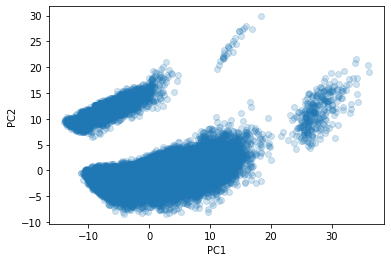

In [ ]:
plt.scatter(new_features['PC1'], new_features['PC2'], alpha=.2)
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.savefig('pc1pc2.png', transparent=False, dpi=150)
plt.show()